# Tuning logistic regression

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [35]:
df = pd.read_csv("https://www.dropbox.com/s/qhf0ocdqb3gh7ni/logistic_regression.csv?dl=1")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EC0C3A828>,
      dtype=object)

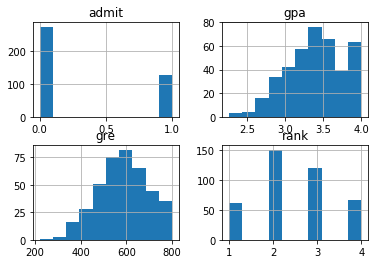

In [37]:
df.hist()

In [38]:
sm_logit = df[['gre', 'gpa']]
sm_logit['intercept'] = 1
Logit = sm.Logit(df.admit, sm_logit)
result = Logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.600430
         Iterations 5


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Mon, 26 Nov 2018   Pseudo R-squ.:                 0.03927
Time:                        19:50:15   Log-Likelihood:                -240.17
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 5.456e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0027      0.001      2.544      0.011       0.001       0.005
gpa            0.7547      0.320      2.361      0.018       0.128       1.381
intercept     -4.9494      1.075     -4.604      0.000      -7.057      -2.842
==============================================================================
"""

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df.admit.ravel(), np.where(result.predict(sm_logit) < 0.5, 0, 1))

array([[263,  10],
       [118,   9]], dtype=int64)

In [40]:
log_clf = LogisticRegression(C=1e9)
log_clf.fit(df[['gpa', 'gre']], df.admit)
y_pred = log_clf.predict(df[['gpa', 'gre']])
confusion_matrix(df.admit, y_pred)

array([[263,  10],
       [118,   9]], dtype=int64)

#### Notes: confusion matrices

The confusion matrices here are identical, but in the exercise C0,1 and C1,0 flip.

In [41]:
log_clf.score(df[['gpa', 'gre']], df.admit)

0.68

In [42]:
df['scores_agg'] = np.square(df.gpa / max(df.gpa) * df.gre / max(df.gre))

In [43]:
log_clf2 = LogisticRegression(penalty='l1', C=2.0)
log_clf2.fit(df.drop(columns=['admit', 'rank']), df.admit)
new_pred = log_clf2.predict(df.drop(columns=['admit', 'rank']))
confusion_matrix(df.admit, new_pred)

array([[268,   5],
       [121,   6]], dtype=int64)

In [44]:
log_clf2.score(df.drop(columns=['admit', 'rank']), df.admit)

0.685

#### Notes: Small improvement

Not much of a reward for building a new feature and using some new tricks in the log_reg bag, but it is nonetheless better.